In [65]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils, plot_model, to_categorical
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pydot

## Checking the gpu being used

In [66]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#tf.debugging.set_log_device_placement(False)

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


## Loading the data set

In [67]:
model_images_path = os.path.join(os.getcwd(),r'model_images')
accuracy_plots_path =os.path.join(os.getcwd(), r'accuracy_plots')

npx_path = os.path.join(os.getcwd(), r"npx_dataset")
x_data = np.load(os.path.join(npx_path, "x_data.npy"))
y_data = np.load(os.path.join(npx_path, "y_data.npy"))

x_data = np.expand_dims(np.array(x_data), axis=3)

print(x_data.shape)
print(y_data.shape)

(87000, 100, 100, 1)
(87000,)


## Splitting the dataset

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.15)


print("x train shape      : ", x_train.shape)
print("y train shape      : ", y_train.shape)
print("\nx validation shape : ", x_valid.shape)
print("y validation shape : ", y_valid.shape)
print("\nx test shape       : ", x_test.shape)
print("y test shape       : ", y_test.shape)

x train shape      :  (62857, 100, 100, 1)
y train shape      :  (62857,)

x validation shape :  (11093, 100, 100, 1)
y validation shape :  (11093,)

x test shape       :  (13050, 100, 100, 1)
y test shape       :  (13050,)


## Normalizing the dataset

In [69]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')

x_train /= 255
x_test /= 255
x_valid /= 255

## Converting y_test and y_train to categorical data

In [70]:
y_train = np_utils.to_categorical(y_train, 29)
y_test  = np_utils.to_categorical(y_test,  29)
y_valid = np_utils.to_categorical(y_valid,  29)

## Defining the parameters for the model

In [71]:
labels = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
batch_size = 256            #batch size while training the model
epochs = 100                #no of traning iterations
n_category = 29             #no of categories
input_shape = (100, 100, 1) #dimensions of the input image
k_size = (3, 3)              #kernel size for cnn

In [72]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32,                     #filters, dimensionality of the output space.
                     kernel_size = k_size,   #kernel size
                     activation = 'relu',    #activation function
                     input_shape = input_shape))     #dimensions of the input layer.    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    #second cnn layer
    model.add(Conv2D(64,                     #filters, dimensionality of the output space.
                     kernel_size = k_size,   #kernel size
                     activation = 'relu'))    #activation function     
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(n_category, activation = 'softmax'))
    
    return model

In [73]:
model = baseline_model()
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['Accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2166848   
_________________________________________________________________
dense_7 (Dense)              (None, 29)               

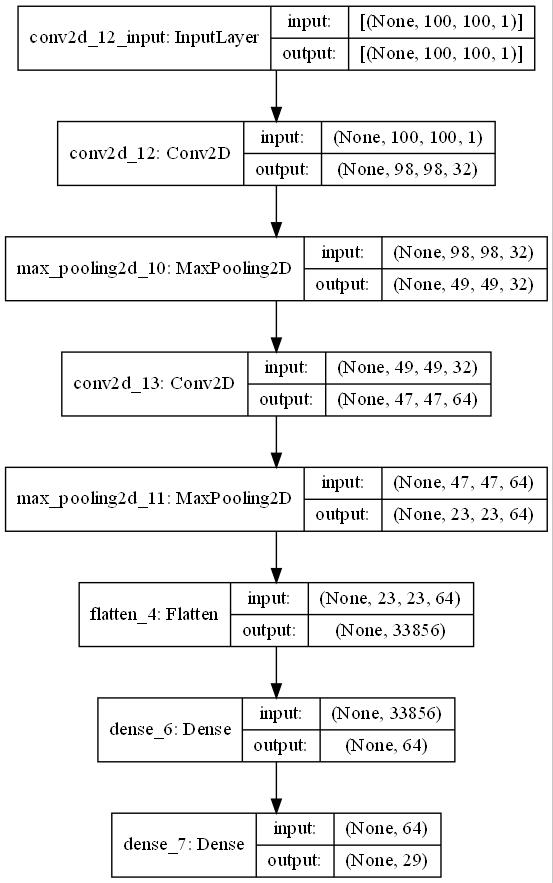

In [74]:
model.summary()
plot_model(model,
          to_file = os.path.join(accuracy_plots_path, "cnn_baseline.jpg"),
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 100)

In [75]:
model_log = model.fit(x_train, y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1, #provide detailed report after each epoch
                     validation_data = (x_valid, y_valid))

Epoch 1/100
246/246 [==============================] - 32s 120ms/step - loss: 2.9999 - accuracy: 0.0000e+00 - val_loss: 1.5452 - val_accuracy: 0.0000e+00
Epoch 2/100
246/246 [==============================] - 28s 115ms/step - loss: 1.2538 - accuracy: 4.5471e-05 - val_loss: 0.8047 - val_accuracy: 3.6370e-04
Epoch 3/100
246/246 [==============================] - 29s 116ms/step - loss: 0.6563 - accuracy: 0.0010 - val_loss: 0.5063 - val_accuracy: 0.0046
Epoch 4/100
246/246 [==============================] - 28s 115ms/step - loss: 0.3968 - accuracy: 0.0056 - val_loss: 0.3329 - val_accuracy: 0.0100
Epoch 5/100
246/246 [==============================] - 28s 116ms/step - loss: 0.2652 - accuracy: 0.0133 - val_loss: 0.2410 - val_accuracy: 0.0202
Epoch 6/100
246/246 [==============================] - 28s 115ms/step - loss: 0.1920 - accuracy: 0.0241 - val_loss: 0.1784 - val_accuracy: 0.0331
Epoch 7/100
246/246 [==============================] - 28s 115ms/step - loss: 0.1375 - accuracy: 0.0379 - va

In [78]:
def evaluate_model(model, model_log, model_name):
    #print(model_log.history['loss'])
    print("train loss = ", model_log.history['loss'][-1])
    print("train accuracy = ", model_log.history['accuracy'][-1])
          
    print("test loss = ", model_log.history['val_loss'][-1])
    print("test accuracy = ", model_log.history['val_accuracy'][-1])

    plt.subplot(2,1,1)
    plt.title(model_name+' accuracy')
    plt.plot(range(1, epochs+1), model_log.history['accuracy'])
    plt.plot(range(1,  epochs+1), model_log.history['val_accuracy'])
    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    
    plt.subplot(2,1,2)
    plt.title(model_name+' loss')
    plt.plot(model_log.history['loss'])
    plt.plot(model_log.history['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'test'], loc='lower right')
    
    plt.tight_layout()
    
    plt.savefig(os.path.join(model_images_path, model_name+"model.jpg"))
    return

train loss =  0.00015232209989335388
train accuracy =  0.4538506269454956
test loss =  0.01490183174610138
test accuracy =  0.45166102051734924


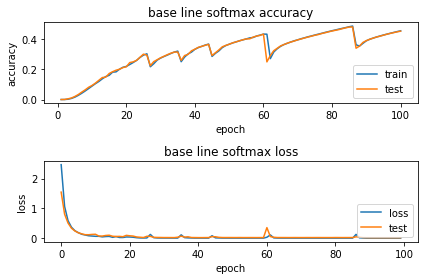

In [79]:
evaluate_model(model, model_log, "base line softmax")